In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [12]:
df = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [13]:
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


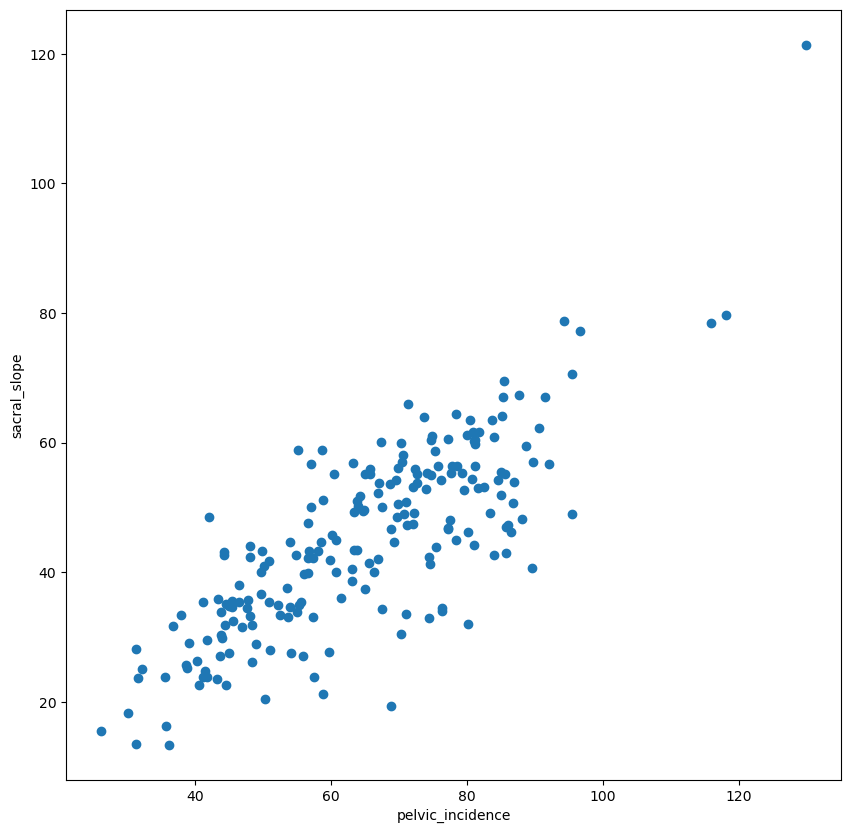

In [14]:
data1 = df[df['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.6458410481075871


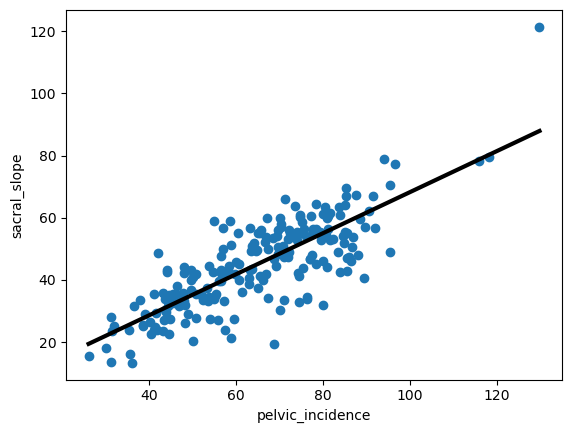

In [15]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score: 0.6492426719559785


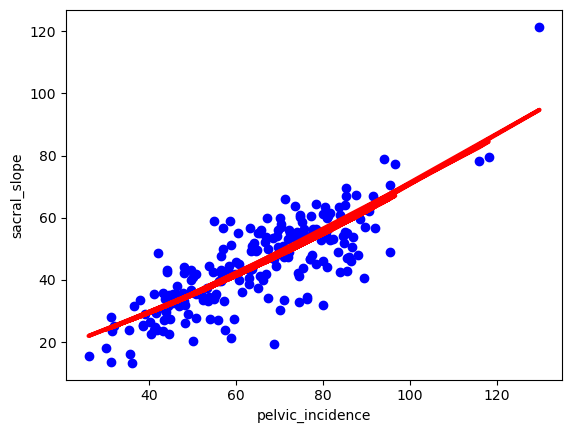

In [20]:

X = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1, 1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1, 1)

s
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


reg = LinearRegression()


reg.fit(X_poly, y)


y_pred = reg.predict(X_poly)


print('R^2 score:', reg.score(X_poly, y))


plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=3)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()


In [34]:

X = data_abnormal[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle']]


y = data_abnormal['sacral_slope']


reg = LinearRegression()


reg.fit(X, y)


print('Intercept:', reg.intercept_)
print('Coefficients:', reg.coef_)


y_pred = reg.predict(X)


r2_score = reg.score(X, y)
print('R-squared score:', r2_score)

Intercept: -5.910649747420393e-10
Coefficients: [ 1.00000000e+00 -1.00000000e+00 -3.40171225e-11]
R-squared score: 1.0
